# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/college_completion.csv',low_memory=False)
print( df.shape, '\n') # 3798 obvs, 63 variables
print( df.head(), '\n')

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

In [ ]:
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



Most institutions (31%) are private non-for-profit and 4-year colleges. The second are public & 2-year institutions (24%), then public 4-year and private for-profit 2-year/4-year all about 15%. Most institutions are 4-year and public.

<Axes: xlabel='grad_100_value', ylabel='Count'>

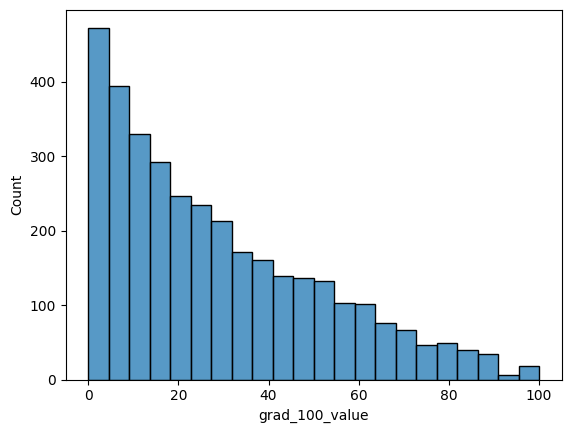

In [ ]:
import seaborn as sns
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

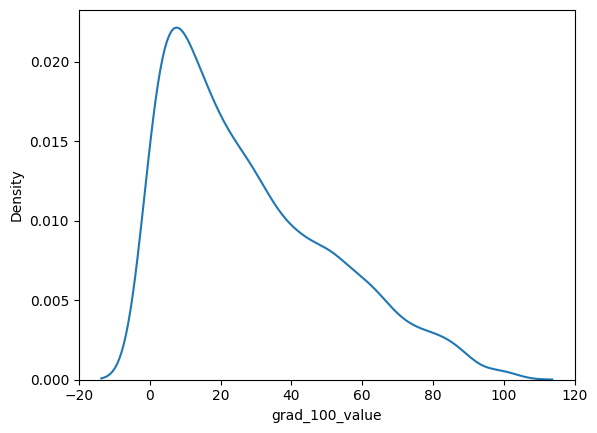

In [ ]:
sns.kdeplot(df['grad_100_value'])

<Axes: ylabel='grad_100_value'>

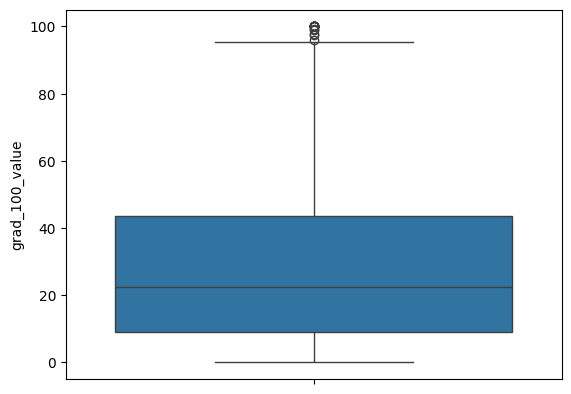

In [ ]:
sns.boxplot(df['grad_100_value'])

In [ ]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

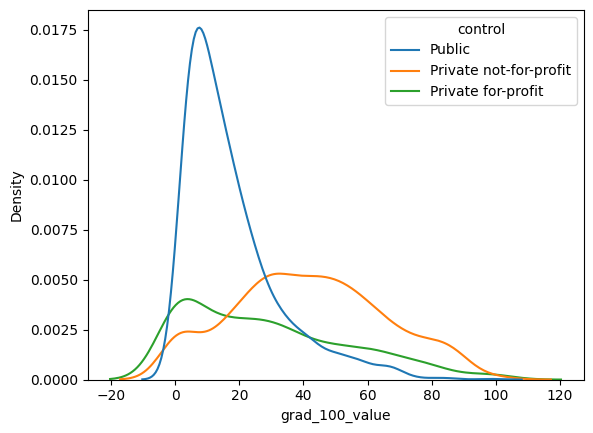

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

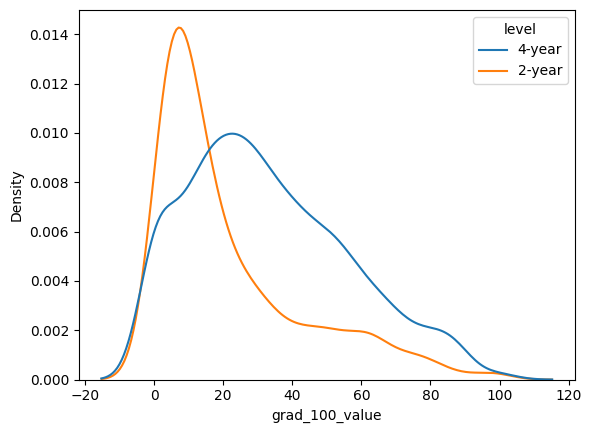

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [ ]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [ ]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

4-year average graduation rates higher and private not-for-profit rates are higher.

<Axes: xlabel='grad_100_value', ylabel='Density'>

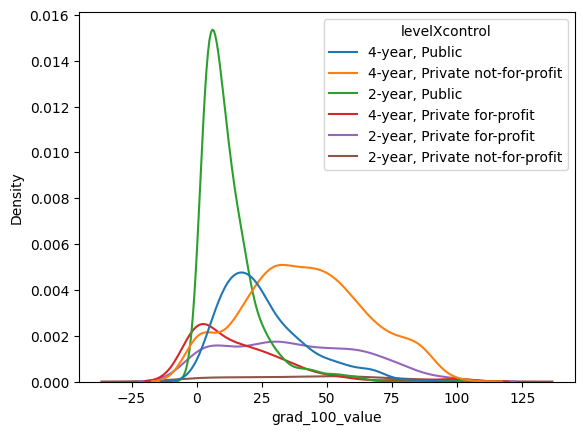

In [ ]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [ ]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

 the private for-profit 2-year rate seems best.

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

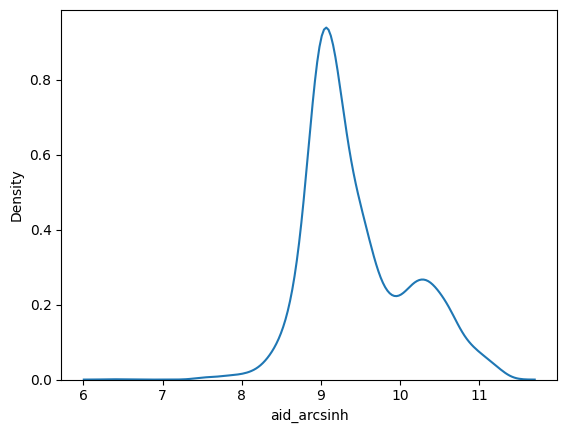

In [ ]:
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh')

<Axes: xlabel='aid_value', ylabel='Density'>

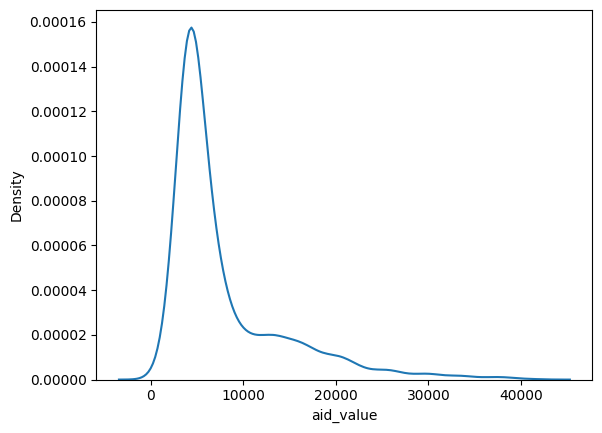

In [ ]:
sns.kdeplot(data=df,x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

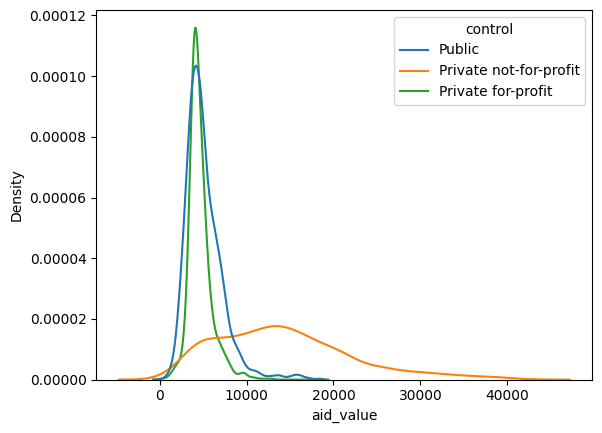

In [ ]:
sns.kdeplot(data=df,x='aid_value',hue='control')

<Axes: xlabel='aid_value', ylabel='Density'>

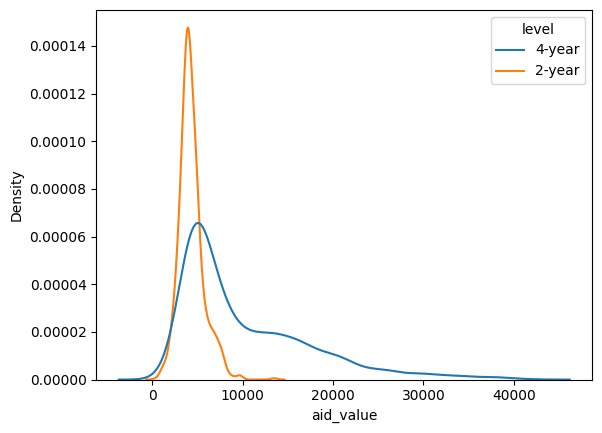

In [ ]:
sns.kdeplot(data=df,x='aid_value',hue='level')

In [ ]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [ ]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

The second mode corresponds to private not-for-profit, and the highest is about 9 corresponds to public and private for-profit.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

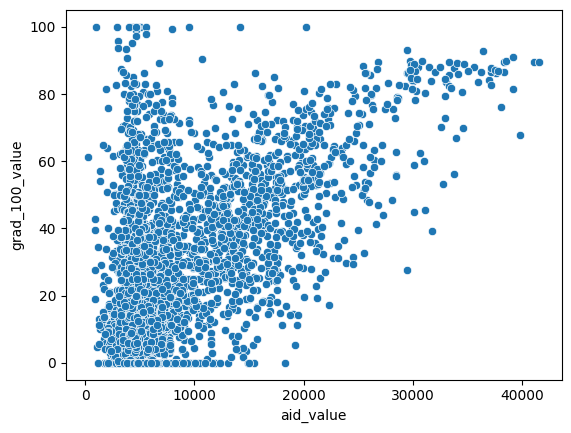

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

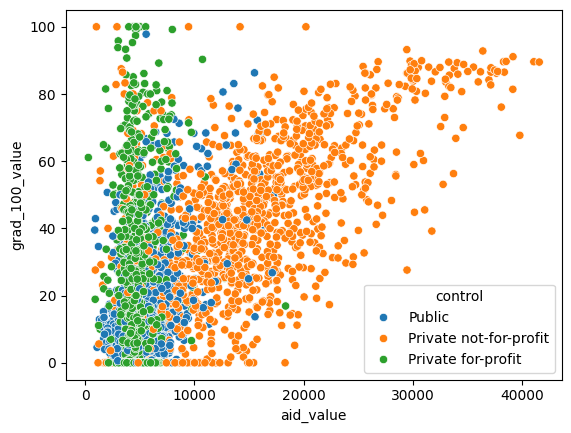

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

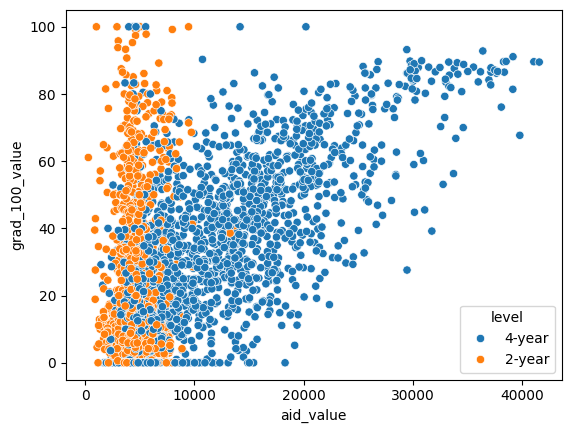

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

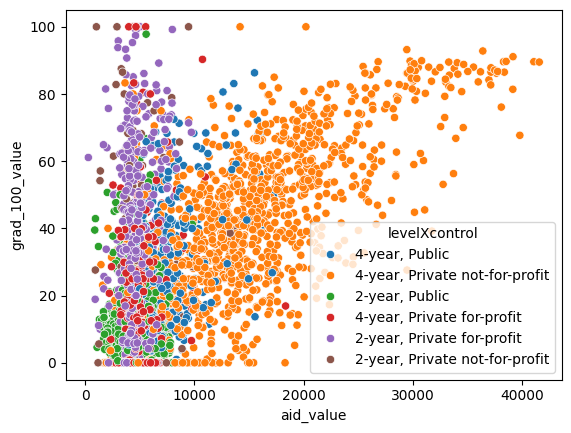

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

private not-for-profit.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

not clean, withh missing values.

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/puf2021_1_fall.csv')
missing_values = df1.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

<ipython-input-26-4383ec2ed6eb>:2: DtypeWarning: Columns (43,46,49,50,51,52,53,73,76,77,81,82,83,85,90,92,99,100,105,106,107,112,113,118,119,123,124,125,126,128,129,135,136,137,138,139,140,142,143,151,155,156,161,163,172,176,183,184,185,186,191,192,193,194,195,197,198,199,200,208,209,210,211,214,217,218,219,220,221,222,223,224,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/puf2021_1_fall.csv')


Columns with missing values:
ADM_H_PDRS      253
INS_PRIVRX     6648
INS_PRIVLTC    6648
INS_PRIVVIS    6648
INS_PRIVDS     6648
               ... 
MA_MADVEYE     7250
MA_MADVNH      9938
MA_MADVPAY     7171
MA_RECMADV     6897
MA_MADVYRS     6989
Length: 186, dtype: int64


In [ ]:
df2 = pd.read_csv('/content/puf2021_1_fall.csv')
missing_values = df2.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

<ipython-input-27-3f90d36f1ae0>:1: DtypeWarning: Columns (43,46,49,50,51,52,53,73,76,77,81,82,83,85,90,92,99,100,105,106,107,112,113,118,119,123,124,125,126,128,129,135,136,137,138,139,140,142,143,151,155,156,161,163,172,176,183,184,185,186,191,192,193,194,195,197,198,199,200,208,209,210,211,214,217,218,219,220,221,222,223,224,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/puf2021_1_fall.csv')


Columns with missing values:
ADM_H_PDRS      253
INS_PRIVRX     6648
INS_PRIVLTC    6648
INS_PRIVVIS    6648
INS_PRIVDS     6648
               ... 
MA_MADVEYE     7250
MA_MADVNH      9938
MA_MADVPAY     7171
MA_RECMADV     6897
MA_MADVYRS     6989
Length: 186, dtype: int64


In [ ]:
df3 = pd.read_csv('/content/puf2021_3_summer.csv')
missing_values = df3.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
CVS_ONEDOSE        5
CVS_VCNUMS         9
RXS_PDEASY       430
RXS_PDKNOW       430
RXS_PDSATSFP    2368
RXS_PDCONFIP    1185
RXS_RXUSEPLN    1185
RXS_RXCOSTLY    1663
RXS_RXAMNTLY    1663
RXS_PDNOCVG     1663
RXS_RXCHGMED    1663
RXS_RXSWTCH     1663
RXS_RXPARTIC    1663
RXS_PDRXRATP    1663
RXS_MCDRGLST     475
RXS_MCFNDPCY     475
RXS_MCRECPLN     475
dtype: int64


In [ ]:
interesting_variables = ['ADM_H_PDRS','INS_PRIVRX']
df1_cleaned = df1[interesting_variables].dropna()

In [ ]:
df2_cleaned = df2[interesting_variables].dropna()

In [ ]:
df1_cleaned['ADM_H_PDRS'] = df1_cleaned['ADM_H_PDRS'].astype('category')
df1_cleaned['INS_PRIVRX'] = df1_cleaned['INS_PRIVRX'].astype('category')

In [ ]:
df2_cleaned['ADM_H_PDRS'] = df2_cleaned['ADM_H_PDRS'].astype('category')
df2_cleaned['INS_PRIVRX'] = df2_cleaned['INS_PRIVRX'].astype('category')

In [ ]:
df1.columns

Index(['PUF_ID', 'SURVEYYR', 'VERSION', 'ADM_H_MEDSTA', 'ADM_H_GHPSW',
       'ADM_H_PDRS', 'ADM_OP_MDCD', 'ADM_DUAL_FLAG_YR', 'ADM_FFS_FLAG_YR',
       'ADM_MA_FLAG_YR',
       ...
       'PUFF091', 'PUFF092', 'PUFF093', 'PUFF094', 'PUFF095', 'PUFF096',
       'PUFF097', 'PUFF098', 'PUFF099', 'PUFF100'],
      dtype='object', length=337)

float64


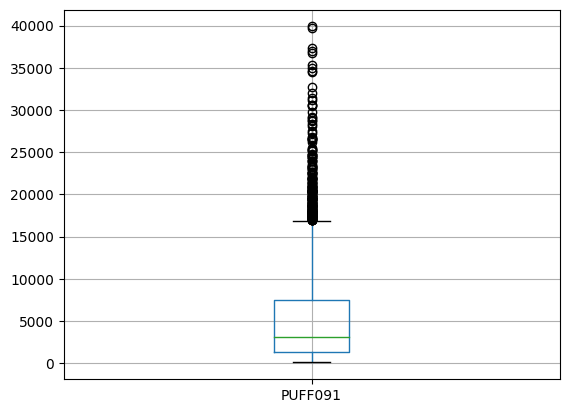

In [ ]:
import matplotlib.pyplot as plt
df1_cleaned['PUFF091'] = pd.to_numeric(df1['PUFF091'])
print(df1_cleaned['PUFF091'].dtype)
df1_cleaned.boxplot(column='PUFF091')
plt.show()

float64


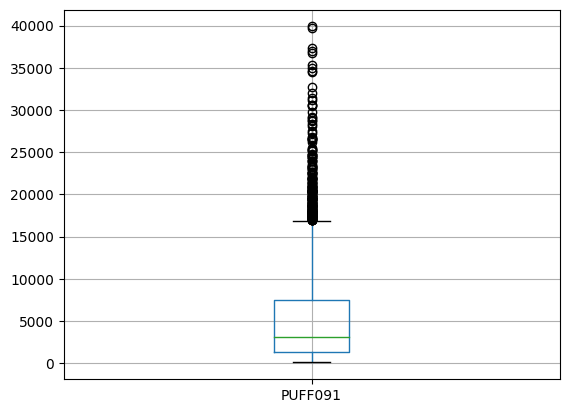

In [ ]:
df2_cleaned['PUFF091'] = pd.to_numeric(df2['PUFF091'])
print(df2_cleaned['PUFF091'].dtype)
df2_cleaned.boxplot(column='PUFF091')
plt.show()

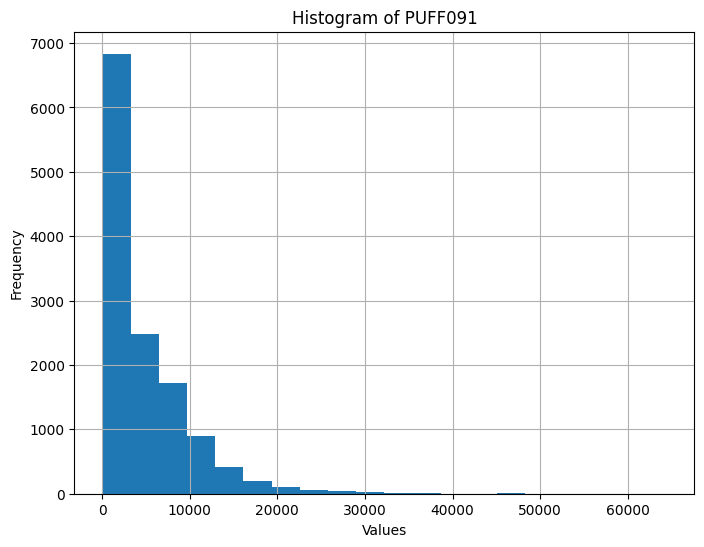

In [ ]:
plt.figure(figsize=(8, 6))
df1['PUFF091'].hist(bins=20)
plt.title('Histogram of PUFF091')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

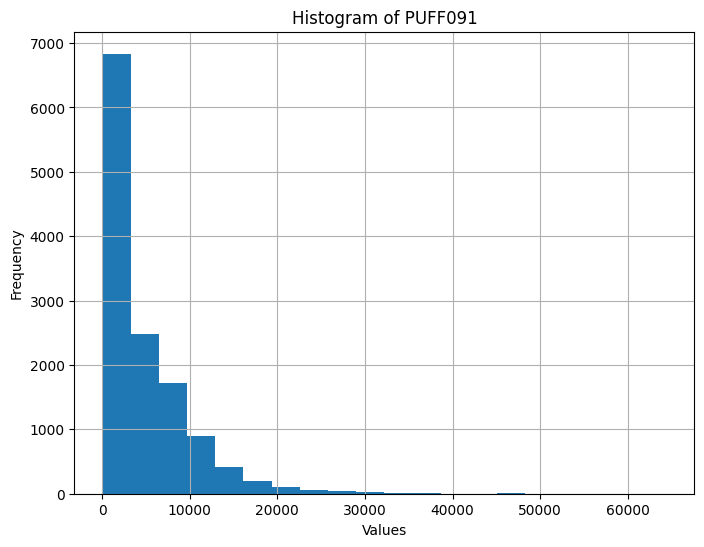

In [ ]:
plt.figure(figsize=(8, 6))
df2['PUFF091'].hist(bins=20)
plt.title('Histogram of PUFF091')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

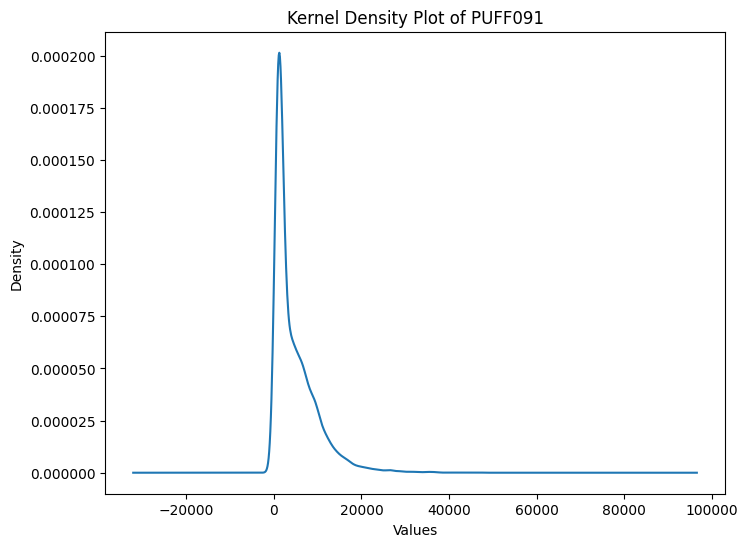

In [ ]:
plt.figure(figsize=(8, 6))
df1['PUFF091'].plot(kind='kde')
plt.title('Kernel Density Plot of PUFF091')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

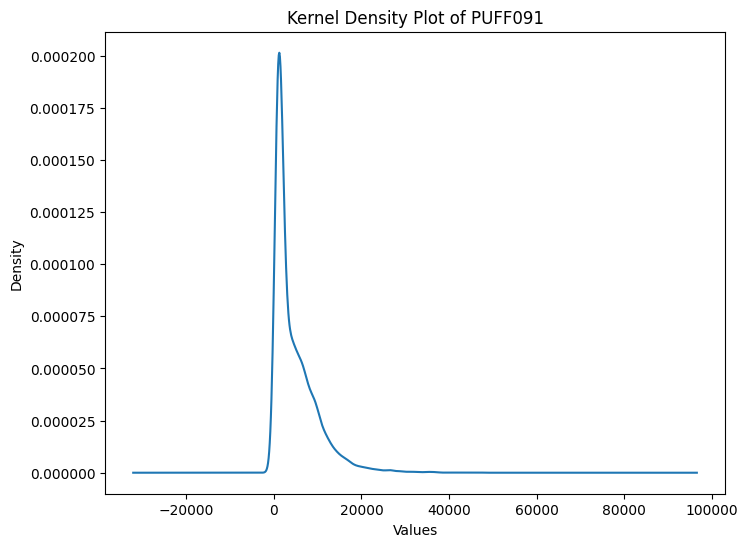

In [ ]:
plt.figure(figsize=(8, 6))
df2['PUFF091'].plot(kind='kde')
plt.title('Kernel Density Plot of PUFF091')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

The histogram shows the frequency distribution of the values in the PUFF091 column.
The kernel density plot provides a smoothed estimate of the probability density function of the data.
Based on the plots, the distribution is skewed

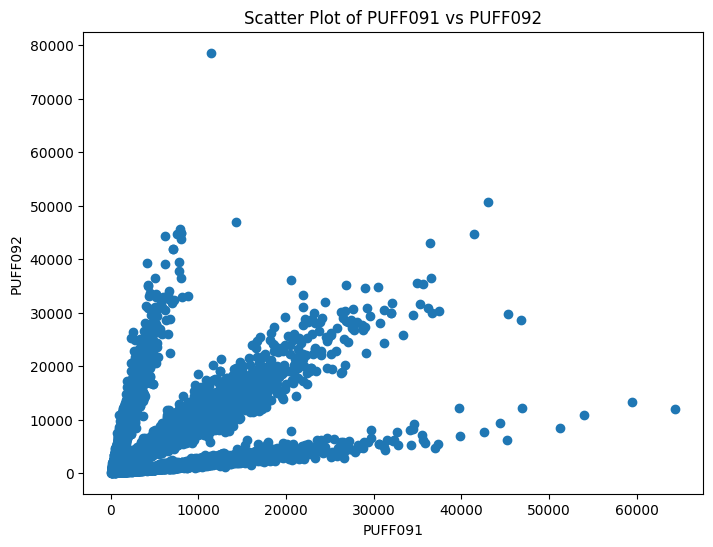

In [ ]:

df1_cleaned['PUFF091'] = pd.to_numeric(df1['PUFF092'])
plt.figure(figsize=(8, 6))
plt.scatter(df1['PUFF091'], df1['PUFF092'])
plt.title('Scatter Plot of PUFF091 vs PUFF092')
plt.xlabel('PUFF091')
plt.ylabel('PUFF092')
plt.show()

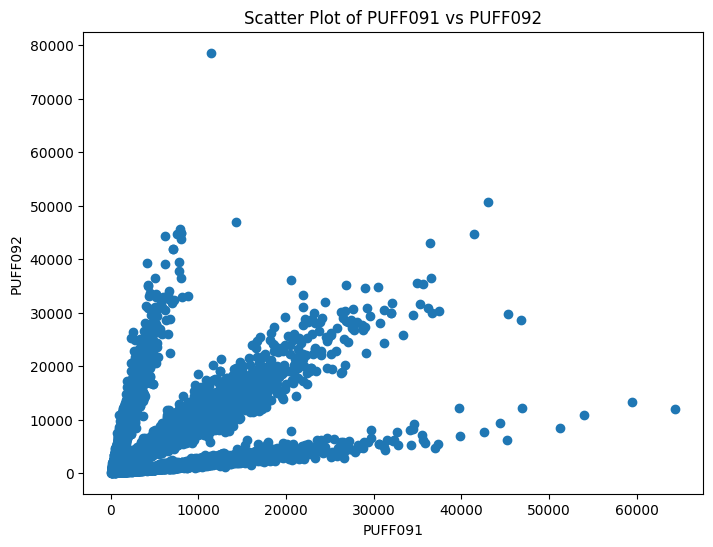

In [ ]:
df2_cleaned['PUFF091'] = pd.to_numeric(df2['PUFF092'])
plt.figure(figsize=(8, 6))
plt.scatter(df2['PUFF091'], df2['PUFF092'])
plt.title('Scatter Plot of PUFF091 vs PUFF092')
plt.xlabel('PUFF091')
plt.ylabel('PUFF092')
plt.show()

non-linear relationship between the variables

In [ ]:
cross_tab = pd.crosstab(df1['VERSION'], df1['SURVEYYR'])

cov_matrix = df1[['PUFF091', 'PUFF092']].cov()

summary = df1[['PUFF091', 'PUFF092']].describe()

print("Cross-tabulation:")
print(cross_tab)
print("\nVariance-Covariance Matrix:")
print(cov_matrix)
print("\nFive-Number Summary:")
print(summary)

Cross-tabulation:
SURVEYYR   2021
VERSION        
1         12783

Variance-Covariance Matrix:
              PUFF091       PUFF092
PUFF091  2.627575e+07  9.718719e+06
PUFF092  9.718719e+06  2.669017e+07

Five-Number Summary:
            PUFF091       PUFF092
count  12783.000000  12783.000000
mean    4765.749928   4761.052724
std     5125.987940   5166.253404
min       61.004664     62.109699
25%     1211.266427   1233.658164
50%     2725.836447   2801.160020
75%     6875.452279   6763.884632
max    64381.152855  78604.929723


In [ ]:
cross_tab = pd.crosstab(df2['VERSION'], df2['SURVEYYR'])

cov_matrix = df2[['PUFF091', 'PUFF092']].cov()

summary = df2[['PUFF091', 'PUFF092']].describe()

print("Cross-tabulation:")
print(cross_tab)
print("\nVariance-Covariance Matrix:")
print(cov_matrix)
print("\nFive-Number Summary:")
print(summary)

Cross-tabulation:
SURVEYYR   2021
VERSION        
1         12783

Variance-Covariance Matrix:
              PUFF091       PUFF092
PUFF091  2.627575e+07  9.718719e+06
PUFF092  9.718719e+06  2.669017e+07

Five-Number Summary:
            PUFF091       PUFF092
count  12783.000000  12783.000000
mean    4765.749928   4761.052724
std     5125.987940   5166.253404
min       61.004664     62.109699
25%     1211.266427   1233.658164
50%     2725.836447   2801.160020
75%     6875.452279   6763.884632
max    64381.152855  78604.929723


here is only one level of SURVEYYR and one level of VERSION, indicating that all observations fall into this category.
Both variables have high variance and positive covariance
It includes the minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
